## Week7 LinearRegression

In week 7, we've covered:
* Simple linear regression
* Multiple linear regression
* Model evaluation
* Build linear regression model with Sklearn  
  
  
In this notebook,  we will work on the Boston housing dataset and  build a linear regression model to predict value of houses. 

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.  
  
  
A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.  
  
  
Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a **TODO** statement and "____"
.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

Upload **Week7_LinearRegression_Homework.ipynb** and **housing.csv** to Google Drive.

In [2]:
# Mount your Google Drive on your runtime using an authorization code
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**TODO**: Replace **`YourFolderName`**  below with the folder name on your google drive where you put the `housing.csv` file. Run the cell, check if `housing.csv` is listed.

In [11]:
!ls /content/drive/My\ Drive/'Colab Notebooks'

'Copy of Week3_PythonProgramming_Homework.ipynb'
'homegrown-2019-master (3).zip'
'homegrown-2019-master (4).zip'
 homegrown-2019-master.zip
'housing[1].csv'
 Untitled0.ipynb
 Untitled1.ipynb
 Untitled2.ipynb
'Week1_PythonProgramming_Homework[1].ipynb'
'Week2_PythonProgramming_Homework (1).ipynb'
'Week2_PythonProgramming_Homework (2).ipynb'
'Week2_PythonProgramming_Homework (3).ipynb'
 Week2_PythonProgramming_Homework.ipynb
 Week3_PythonProgramming_Homework.ipynb
 Week4_HomeWork.ipynb
'Week4_PythonProgramming_Homework[1].ipynb'
'Week4_PythonProgramming_Homework_Solution[1].ipynb'
'Week5_PythonProgramming_Homework[1].ipynb'
 Week5_PythonProgramming_Homework.ipynb
'Week5_PythonProgramming_Homework_Solution[1].ipynb'
'Week6_intro_to_visualization[1].ipynb'
'Week6_intro_to_visualization_solution[1].ipynb'
'Week7_LinearRegression_Homework[1] (1).ipynb'
'Week7_LinearRegression_Homework[1].ipynb'


----
## 1. Import Libraries
Import pandas, numpy, matplotlib and seaborn. Then set %matplotlib inline.

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

---
## 2. Load Data
Read in the housing.csv file as a DataFrame called `data`.

In [15]:
# TODO Replace YourFolderName with the folder name on your google drive

import pandas as pd
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/housing[1].csv')


# Success
print("Boston housing dataset has {} data points with {} columns.".format(*data.shape))

Boston housing dataset has 489 data points with 4 columns.


---
## 3. Expplore Data

Check the head of `data`, and check out its `info()` and `describe()`methods.

In [18]:

data.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
RM         489 non-null float64
LSTAT      489 non-null float64
PTRATIO    489 non-null float64
MEDV       489 non-null float64
dtypes: float64(4)
memory usage: 15.4 KB


In [20]:

data.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**.  
  

The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point.   
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.   
  
The **target variable**, `'MEDV'`, will be the variable we seek to predict.  

These are stored in **features** and **prices**, respectively.

In [30]:
# TODO  

prices = data["MEDV"] #target
features = data.drop(columns=['MEDV']) #feature
features.head() 

,RM,LSTAT,PTRATIO
0,6.575,4.98,15.3
1,6.421,9.14,17.8
2,7.185,4.03,17.8
3,6.998,2.94,18.7
4,7.147,5.33,18.7


Calculate Statistics
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in **prices**.
- Store each calculation in their respective variable.
- Use `numpy` to perform the necessary calcualtions.

In [34]:
# TODO: Minimum price of the data
minimum_price = min(prices)

# TODO: Maximum price of the data
maximum_price = max(prices)
# TODO: Mean price of the data
mean_price = round(prices.mean(),2)

# TODO: Median price of the data
median_price = prices.median()

# TODO: Standard deviation of prices of the data
std_price = round(prices.std(),2)

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${}".format(minimum_price)) 
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105000.0
Maximum price: $1024800.0
Mean price: $454342.94
Median price $438900.0
Standard deviation of prices: $165340.28


Observe features

For each of the three features **RM**, **LSTAT**, **PTRATIO**:
  * Do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? 
  * Show the data using appropriate plot and justify your answer for each.

RM: An increase in the average number of rooms per household would increase the value of MEDV or price.
LSTAT: An increase in the number of households considered low class would decrease the value of MEDV or price.
PTRATIO: An increase in the ratio of students to teachers would have no affect on the pricing or MEDV of households.


Text(0.5, 0, 'students to teacher ratio')

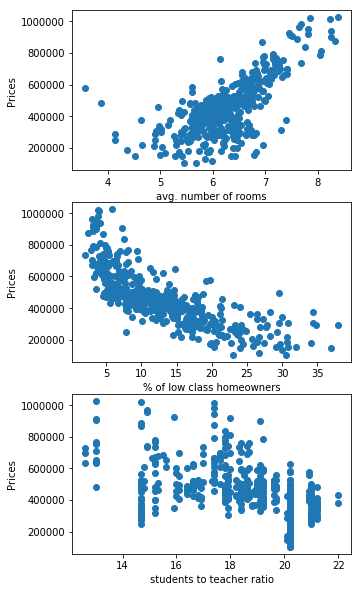

In [139]:
plt.figure(figsize=(5,10))

print('RM: An increase in the average number of rooms per household would increase the value of MEDV or price.')
plt.subplot(311) #311 = abc where ab = axb grid and c = position
plt.plot(data['RM'], prices, 'o');
plt.ylabel('Prices')
plt.xlabel('avg. number of rooms')



print('LSTAT: An increase in the number of households considered low class would decrease the value of MEDV or price.')
plt.subplot(312)
plt.plot(data['LSTAT'], prices, 'o')
plt.ylabel('Prices')
plt.xlabel('% of low class homeowners')


print('PTRATIO: An increase in the ratio of students to teachers would have no affect on the pricing or MEDV of households.')
plt.subplot(313)
plt.plot(data['PTRATIO'], prices, 'o')
plt.ylabel('Prices')
plt.xlabel('students to teacher ratio')


**Answer**:    

----

## 4. Develope a Model

Split data to get training and testing Data.

In [0]:
# TODO
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features,prices, test_size=0.2 , random_state=99) #default test size 25/75 #random state - why not 42 recommended?


Train the Model.

In [0]:

from sklearn.linear_model import LinearRegression
lm = LinearRegression()

Train/fit **lm** on the training data.

In [57]:

lm.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Print out the coefficients of the model, use **.coef_**.

In [58]:

lm.coef_


array([ 78438.74432206, -11562.08759587, -21860.06838306])

Display a dataframe with the features and their corresponding coefficients in descending order. Think about how would you interprete the results here.

In [67]:
df = pd.DataFrame({"Feature": features.columns, "Coef": lm.coef_}, 
                       columns=["Feature", "Coef"])

df.sort_values(by=['Coef'], ascending = False)

,Feature,Coef
0,RM,78438.744322
1,LSTAT,-11562.087596
2,PTRATIO,-21860.068383


## 5. Predict the Test Data

Now we have a trained model, let's make some predictions and evaluate the model's performance.

Use **lm.predict( )** to predict the prices for **X_test** data set.

In [0]:
predict = lm.predict(X_test)



Create a scatterplot of **y_test** versus the predicted values.

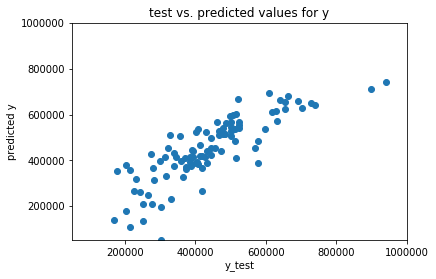

In [91]:
#print(predict.min())
plt.scatter(y_test,predict)
plt.xlabel('y_test')
plt.ylabel('predicted y')
plt.title('test vs. predicted values for y')
plt.xlim(50000,1000000)
plt.ylim(50000,1000000)
plt.show()

## 6. Evaluate the Model

Let's evaluate the model performance by calculating the $R^2$.  

In [0]:
# TODO import r2_score
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true,y_predict)
    
    # Return the score
    return score
  

Use `Performance_metric` function to calculate the test dataset's $R^2$.

In [101]:
rSq = performance_metric(y_test,predict)
print(rSq)

0.672336408729161


Would you consider this model to have successfully captured the variation of the target variable? Why or why not?

**Hint:**  
The $R^2$ score is the proportion of the variance in the dependent variable that is predictable from the independent variable. In other words:
* $ R^2$ score of 0 means that the dependent variable cannot be predicted from the independent variable.
* $R^2$ score of 1 means the dependent variable can be predicted from the independent variable.
* $R^2$ score between 0 and 1 indicates the extent to which the dependent variable is predictable. An 
* $R^2$ score of 0.40 means that 40 percent of the variance in Y is predictable from X.

**Answer:** 
*I would consider this model unsuccessful. Only ~67% of the variance in Y is predictable from X, but there is stil room for improvement to get this value closer to 1.*

## THE END, WELL DONE!

## Submission

Download completed **Week7_LinearRegression_Homework.ipynb** from Google Colab and commit to your personal Github repo you shared with the faculty.